In [293]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [294]:
#load data
df = pd.read_csv('online_retail.csv')

In [295]:
#remove white space contains in columns
df.columns = df.columns.str.replace(' ', '')

In [296]:
df.columns

Index(['Invoice', 'Product', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [297]:
#change to Pandas datetime format
df['Date'] = pd.to_datetime(df['Date'] )

In [298]:
print('Time period start: {}\nTime period end: {}'.format(df.Date.min(), df.Date.max()))

Time period start: 2010-12-01 08:26:00
Time period end: 2011-03-31 19:55:00


In [299]:
len(df)

137063

In [300]:
#define date period to prepare transaction
start_date = '2010-12-01'
end_date = '2011-02-28'

In [301]:
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)

In [302]:
transaction = df.loc[mask]

In [303]:
len(transaction)

100324

In [304]:
transaction.head()

,Invoice,Product,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [305]:
transaction.dtypes

Invoice                int64
Product               object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object

In [306]:
basket = (transaction.groupby(['Invoice', 'Product'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [307]:
#print a subset of columns from the dataframe
basket.iloc[:,[0,1,2,3,4,5,6,7]].head()

Product,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES
Invoice,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [309]:
basket_sets = basket.applymap(encode_units)

In [310]:
len(basket)

3674

In [311]:
#Build up frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

In [312]:
frequent_itemsets.head()

,support,itemsets
0,0.027490,(12 PENCILS SMALL TUBE RED RETROSPOT)
1,0.022047,(12 PENCILS SMALL TUBE SKULL)
2,0.025857,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
3,0.025857,(3 PIECE SPACEBOY COOKIE CUTTER SET)
4,0.022591,(3 STRIPEY MICE FELTCRAFT)


In [313]:
#apply the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.045727,0.072128,0.027490,0.601190,8.334996,0.024192,2.326603
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.072128,0.045727,0.027490,0.381132,8.334996,0.024192,1.541966
2,(72 SWEETHEART FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.048993,0.072128,0.020686,0.422222,5.853753,0.017152,1.605931
3,(PACK OF 72 RETROSPOT CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.072128,0.048993,0.020686,0.286792,5.853753,0.017152,1.333423
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE ORANGE),0.056886,0.029396,0.021775,0.382775,13.021442,0.020102,1.572529


In [314]:
#rules[ (rules['lift'] >= 3) &
       #(rules['confidence'] >= 0.5)]

#Visualization

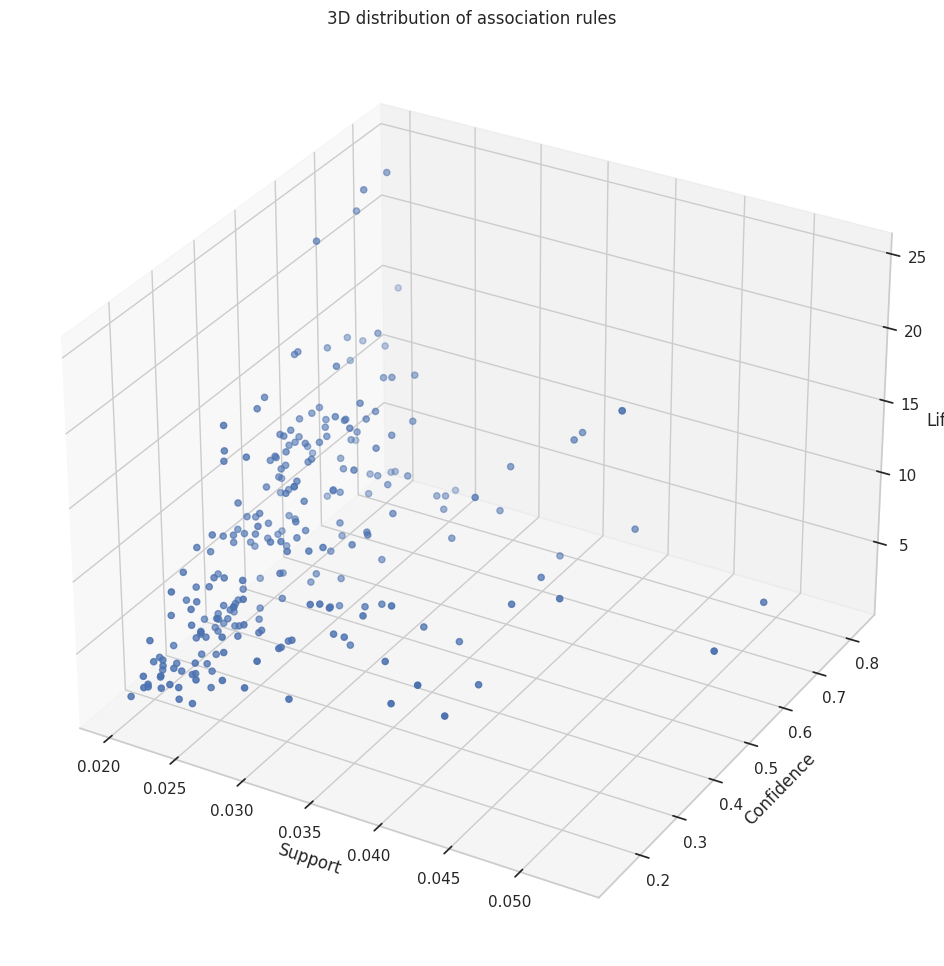

In [315]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')

x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D distribution of association rules")
plt.show()
